<a href="https://colab.research.google.com/github/sharulvsk/Accident-Detection-/blob/main/Traffic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install --upgrade tensorflow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 95.5 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.1
    Uninstalling tensorboard-2.17.1:
      Successfully uninstalled tensorboard-2.17.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.17.1
    Uninstalling tensorflow-2.17.1:
      Successfully uninstalled tensorflow-2.17.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.17.0 requires tensorflow<2.18,>=2.17, but you have tensorflow 2.18.0 which is incompatible.


In [3]:
import matplotlib.image as mpimg
import os

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Rescaling
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
from glob import glob
import cv2

import warnings
warnings.filterwarnings('ignore')


In [4]:
 from zipfile import ZipFile
data_path = '/content/drive/MyDrive/archive (5).zip'
from zipfile import ZipFile
with ZipFile(data_path, 'r') as zip:
	zip.extractall()

In [5]:
# path to the folder containing our dataset
dataset = '../content/traffic_Data/DATA'

# path of label file
labelfile = pd.read_csv('labels.csv')


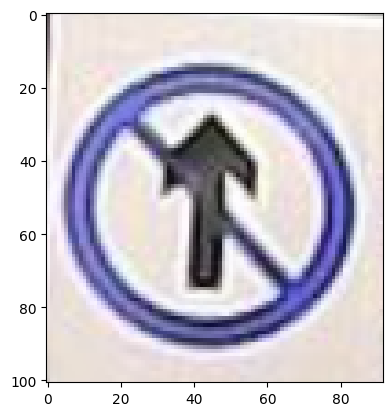

In [6]:
# Visualize some images from the dataset
img = cv2.imread("/content/traffic_Data/DATA/10/010_0011.png")
plt.imshow(img)


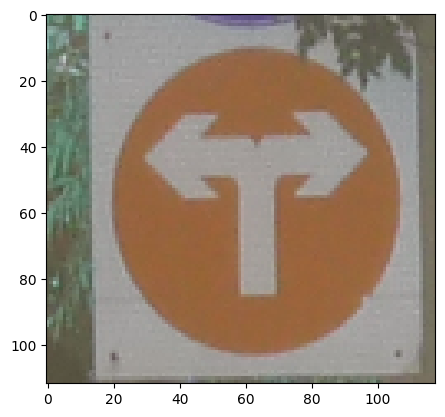

In [7]:
img = cv2.imread("/content/traffic_Data/DATA/23/023_0001.png")
plt.imshow(img)


In [8]:
labelfile.head()


,ClassId,Name
0,0,Speed limit (5km/h)
1,1,Speed limit (15km/h)
2,2,Speed limit (30km/h)
3,3,Speed limit (40km/h)
4,4,Speed limit (50km/h)


In [9]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(dataset, validation_split=0.2,
															subset='training',
															image_size=(
																224, 224),
															seed=123,
															batch_size=32)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(dataset, validation_split=0.2,
															subset='validation',
															image_size=(
																224, 224),
															seed=123,
															batch_size=32)


Found 4170 files belonging to 58 classes.
Using 3336 files for training.
Found 4170 files belonging to 58 classes.
Using 834 files for validation.


In [10]:
class_numbers = train_ds.class_names
class_names = []
for i in class_numbers:
	class_names.append(labelfile['Name'][int(i)])


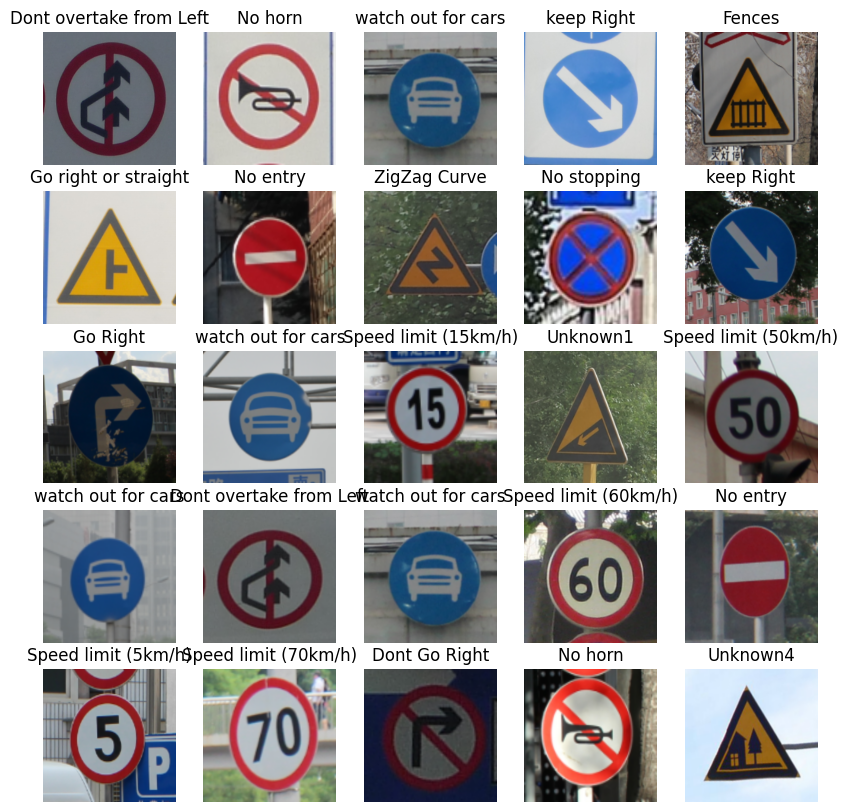

In [11]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
	for i in range(25):
		ax = plt.subplot(5, 5, i + 1)
		plt.imshow(images[i].numpy().astype("uint8"))
		plt.title(class_names[labels[i]])
		plt.axis("off")

plt.show()


In [12]:
# Updated Code with Preprocessing Layers Imported Correctly:
import tensorflow as tf

data_augmentation = tf.keras.Sequential(
    [
        tf.keras.layers.RandomFlip(
            "horizontal", input_shape=(224, 224, 3)
        ),
        tf.keras.layers.RandomRotation(0.1),
        tf.keras.layers.RandomZoom(0.2),
        tf.keras.layers.RandomFlip(mode="horizontal_and_vertical"),
    ]
)

In [13]:
model = Sequential()
model.add(data_augmentation)
model.add(Rescaling(1./255))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dense(len(labelfile), activation='softmax'))


In [14]:
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling (Rescaling)                │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 222, 222, 128)       │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 24, 24, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36864)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       2,359,360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 58)                  │           7,482 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,821,562 (10.76 MB)

 Trainable params: 2,821,562 (10.76 MB)

 Non-trainable params: 0 (0.00 B)

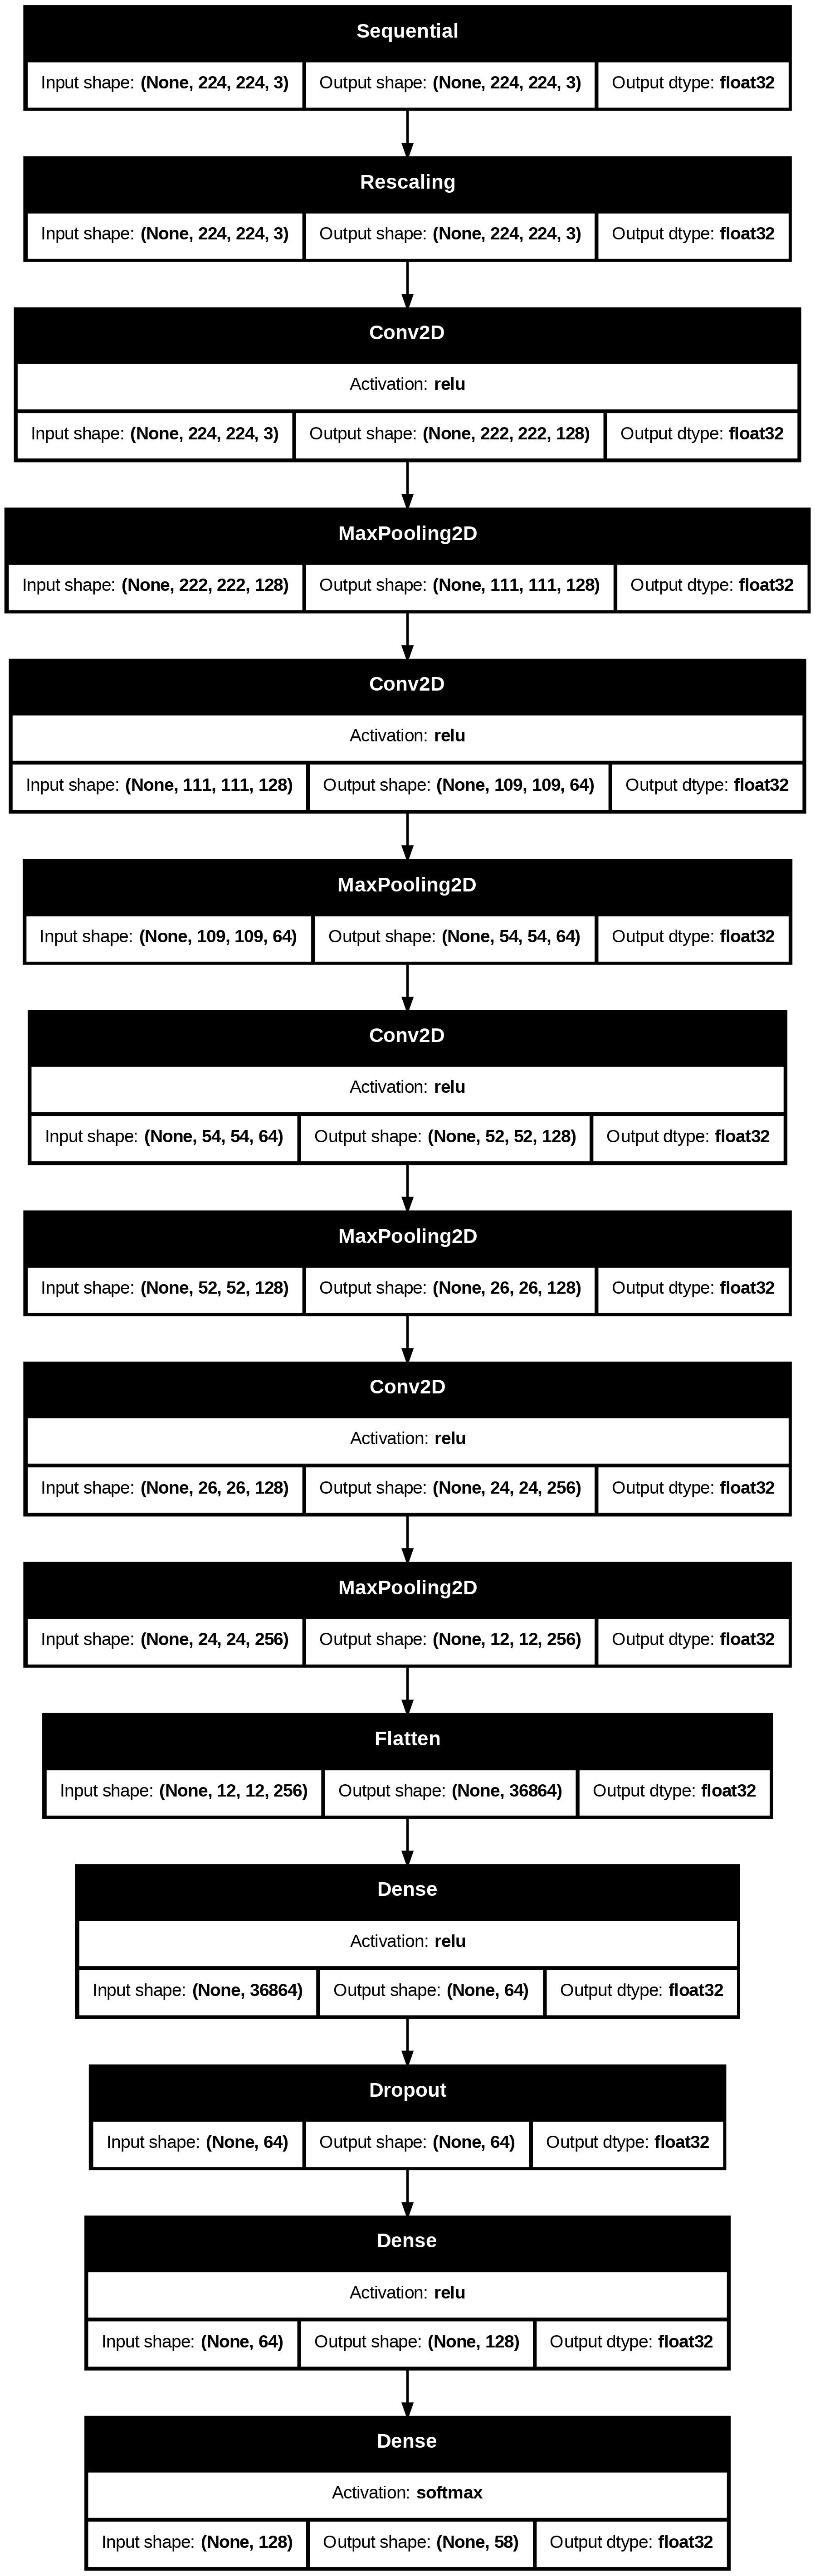

In [15]:
import tensorflow as tf

# ... (Rest of your code remains the same)

tf.keras.utils.plot_model(
	model,
	show_shapes=True,
	show_dtype=True,
	show_layer_activations=True
)

In [16]:

mycallbacks = [EarlyStopping(monitor='val_loss', patience=5)]

model.compile(optimizer='adam', # You can choose a different optimizer if needed
              loss='sparse_categorical_crossentropy', # Adjust loss function if needed
              metrics=['accuracy']) # You can add other metrics if needed

history = model.fit(train_ds,
				validation_data=val_ds,
				epochs=50,
				callbacks=mycallbacks)

Epoch 1/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 25s 166ms/step - accuracy: 0.0947 - loss: 3.6496 - val_accuracy: 0.2242 - val_loss: 2.6051
Epoch 2/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 15s 145ms/step - accuracy: 0.2989 - loss: 2.6157 - val_accuracy: 0.4257 - val_loss: 1.9891
Epoch 3/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 16s 153ms/step - accuracy: 0.3682 - loss: 2.1466 - val_accuracy: 0.4880 - val_loss: 1.6803
Epoch 4/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 19s 141ms/step - accuracy: 0.4263 - loss: 1.8612 - val_accuracy: 0.5144 - val_loss: 1.5234
Epoch 5/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 21s 150ms/step - accuracy: 0.4523 - loss: 1.6927 - val_accuracy: 0.5791 - val_loss: 1.3969
Epoch 6/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 20s 143ms/step - accuracy: 0.4815 - loss: 1.5782 - val_accuracy: 0.5923 - val_loss: 1.3437
Epoch 7/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 21s 146ms/step - accuracy: 0.5072 - loss: 1.5089 - val_accuracy: 0.5827 - val_loss: 1.2532
Epoch 8/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 20s 144ms/step - accuracy: 0.5249 - loss: 1

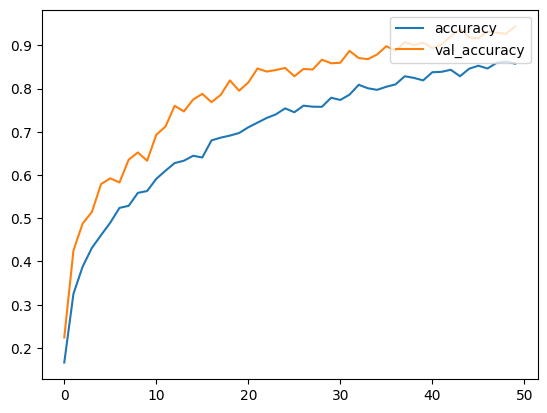

In [22]:
# Loss
#plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
#plt.legend(['loss', 'val_loss'], loc='upper right')

# Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'], loc='upper right')
